In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
from pprint import pprint
from api_key import weather_api
from random import uniform
from citipy import citipy
import numpy as np

In [2]:
coordinate=[]
cities=[]

In [3]:
def newpoint():
   return uniform(-90,90), uniform(-180, 180)

points = (newpoint() for x in range(1500))
for point in points:
   coordinate.append(point)

In [4]:
for coordinate_pair in coordinate:
    lat, lon = coordinate_pair
    city=citipy.nearest_city(lat, lon)
    cities.append(city.city_name)

In [5]:
df_cities=pd.DataFrame({'City':cities})
print(len(df_cities))
df_cities=df_cities.drop_duplicates('City')
print(len(df_cities))

1500
618


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    'appid': weather_api,
    'units': 'imperial'
    }

In [7]:
temp=[]
cloud=[]
wind=[]
humid=[]
lat=[]
long=[]

In [8]:
for city in df_cities['City']:
    params['q'] = city
    response = requests.get(url, params=params).json()

    try:
        temp.append(response['main']['temp'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        humid.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
    except KeyError:
        temp.append('NaN')
        wind.append('NaN')
        cloud.append('NaN')
        humid.append('NaN')
        lat.append('NaN')
        long.append('NaN')
    
    print(response)

{'coord': {'lon': -70.91, 'lat': -53.16}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 38.35, 'pressure': 1014, 'humidity': 100, 'temp_min': 37.4, 'temp_max': 39.2}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1531101600, 'sys': {'type': 1, 'id': 4642, 'message': 0.0037, 'country': 'CL', 'sunrise': 1531140875, 'sunset': 1531169013}, 'id': 3874787, 'name': 'Punta Arenas', 'cod': 200}
{'coord': {'lon': -60.38, 'lat': -5.12}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 81.48, 'pressure': 1019.98, 'humidity': 68, 'temp_min': 81.48, 'temp_max': 81.48, 'sea_level': 1026.02, 'grnd_level': 1019.98}, 'wind': {'speed': 4.38, 'deg': 38.5006}, 'clouds': {'all': 0}, 'dt': 1531104336, 'sys': {'message': 0.0033, 'country': 'BR', 'sunrise': 1531131094, 'sunset': 1531173722}, 'id': 3663142, 'name': 'Novo Ari

{'coord': {'lon': 54.44, 'lat': 31.58}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 80.6, 'pressure': 1012, 'humidity': 13, 'temp_min': 80.6, 'temp_max': 80.6}, 'visibility': 10000, 'wind': {'speed': 2.24, 'deg': 130}, 'clouds': {'all': 20}, 'dt': 1531101600, 'sys': {'type': 1, 'id': 7060, 'message': 0.0041, 'country': 'IR', 'sunrise': 1531099467, 'sunset': 1531150217}, 'id': 124274, 'name': 'Mehriz', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -139.03, 'lat': -9.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 79.41, 'pressure': 1023.38, 'humidity': 100, 'temp_min': 79.41, 'temp_max': 79.41, 'sea_level': 1023.38, 'grnd_level': 1023.38}, 'wind': {'speed': 18.14, 'deg': 94.0006}, 'clouds': {'all': 0}, 'dt': 1531104774, 'sys': {'message': 0.0029, 'country': '

{'coord': {'lon': -68.52, 'lat': 63.75}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 37.4, 'pressure': 995, 'humidity': 75, 'temp_min': 37.4, 'temp_max': 37.4}, 'visibility': 48279, 'wind': {'speed': 13.87, 'deg': 160}, 'clouds': {'all': 90}, 'dt': 1531101600, 'sys': {'type': 1, 'id': 3590, 'message': 0.0036, 'country': 'CA', 'sunrise': 1531118284, 'sunset': 1531190321}, 'id': 5983720, 'name': 'Iqaluit', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 89.89, 'lat': 52.8}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 58.35, 'pressure': 947.02, 'humidity': 64, 'temp_min': 58.35, 'temp_max': 58.35, 'sea_level': 1025.33, 'grnd_level': 947.02}, 'wind': {'speed': 5.61, 'deg': 55.5006}, 'clouds': {'all': 0}, 'dt': 1531104778, 'sys': {'message': 0.0044, 'country': 'RU', 'sunrise': 1531086421, 'sunset': 1531146220}

{'coord': {'lon': 47.16, 'lat': 61.32}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 67.62, 'pressure': 1001.74, 'humidity': 84, 'temp_min': 67.62, 'temp_max': 67.62, 'sea_level': 1017.75, 'grnd_level': 1001.74}, 'wind': {'speed': 5.73, 'deg': 65.0006}, 'clouds': {'all': 8}, 'dt': 1531104783, 'sys': {'message': 0.0133, 'country': 'RU', 'sunrise': 1531092575, 'sunset': 1531160537}, 'id': 544370, 'name': 'Koryazhma', 'cod': 200}
{'coord': {'lon': 15.09, 'lat': 32.38}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.41, 'pressure': 1025.65, 'humidity': 99, 'temp_min': 70.41, 'temp_max': 70.41, 'sea_level': 1028.53, 'grnd_level': 1025.65}, 'wind': {'speed': 2.93, 'deg': 114.001}, 'clouds': {'all': 0}, 'dt': 1531104783, 'sys': {'message': 0.0037, 'country': 'LY', 'sunrise': 1531108798, 'sunset': 1531159775}, 'id': 2214846, 'name': 'Misra

{'coord': {'lon': -77.8, 'lat': 35.94}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 69.78, 'pressure': 1025, 'humidity': 68, 'temp_min': 64.4, 'temp_max': 73.4}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 20}, 'clouds': {'all': 1}, 'dt': 1531103700, 'sys': {'type': 1, 'id': 1810, 'message': 0.004, 'country': 'US', 'sunrise': 1531130551, 'sunset': 1531182611}, 'id': 4488762, 'name': 'Rocky Mount', 'cod': 200}
{'coord': {'lon': 145.57, 'lat': 43.32}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 59, 'pressure': 1021, 'humidity': 82, 'temp_min': 59, 'temp_max': 59}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 60}, 'clouds': {'all': 75}, 'dt': 1531101600, 'sys': {'type': 1, 'id': 7526, 'message': 0.0042, 'country': 'JP', 'sunrise': 1531075559, 'sunset': 1531130368}, 'id': 2128975, 'name': 'Nemuro', 'cod': 200}
{'coo

{'coord': {'lon': 161.3, 'lat': 68.75}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 48.9, 'pressure': 1020.55, 'humidity': 53, 'temp_min': 48.9, 'temp_max': 48.9, 'sea_level': 1028.57, 'grnd_level': 1020.55}, 'wind': {'speed': 6.73, 'deg': 357.001}, 'clouds': {'all': 80}, 'dt': 1531104792, 'sys': {'message': 0.0038, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2126199, 'name': 'Cherskiy', 'cod': 200}
{'coord': {'lon': 166.46, 'lat': -22.28}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1014, 'humidity': 47, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 9.17, 'deg': 140}, 'clouds': {'all': 0}, 'dt': 1531103400, 'sys': {'type': 1, 'id': 8344, 'message': 0.0035, 'country': 'NC', 'sunrise': 1531078454, 'sunset': 1531117473}, 'id': 2139521, 'name': 'Noumea', 'cod': 200}
{'cod': 

{'coord': {'lon': 57.76, 'lat': -20.34}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1022, 'humidity': 68, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 150}, 'clouds': {'all': 40}, 'dt': 1531101600, 'sys': {'type': 1, 'id': 6729, 'message': 0.0039, 'country': 'MU', 'sunrise': 1531104321, 'sunset': 1531143787}, 'id': 1106677, 'name': 'Bambous Virieux', 'cod': 200}
{'coord': {'lon': -67.48, 'lat': -45.87}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 41, 'pressure': 1027, 'humidity': 100, 'temp_min': 41, 'temp_max': 41}, 'visibility': 10000, 'wind': {'speed': 5.82, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1531101600, 'sys': {'type': 1, 'id': 4741, 'message': 0.0031, 'country': 'AR', 'sunrise': 1531138175, 'sunset': 1531170063}, 'id': 3860443, 'name': 'Comodoro Riv

{'coord': {'lon': -73.32, 'lat': -37.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 48.2, 'pressure': 1019, 'humidity': 93, 'temp_min': 48.2, 'temp_max': 48.2}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 240}, 'clouds': {'all': 0}, 'dt': 1531101600, 'sys': {'type': 1, 'id': 4655, 'message': 0.0031, 'country': 'CL', 'sunrise': 1531137990, 'sunset': 1531173048}, 'id': 3899462, 'name': 'Arauco', 'cod': 200}
{'coord': {'lon': 71.44, 'lat': 31.84}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 95.43, 'pressure': 987.8, 'humidity': 40, 'temp_min': 95.43, 'temp_max': 95.43, 'sea_level': 1007.66, 'grnd_level': 987.8}, 'wind': {'speed': 5.28, 'deg': 105.001}, 'clouds': {'all': 0}, 'dt': 1531104802, 'sys': {'message': 0.0033, 'country': 'PK', 'sunrise': 1531095348, 'sunset': 1531146175}, 'id': 1179496, 'name': 'Dullewala', 'cod': 2

{'coord': {'lon': 119.33, 'lat': 31.35}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 89.31, 'pressure': 1013.9, 'humidity': 86, 'temp_min': 89.31, 'temp_max': 89.31, 'sea_level': 1020.5, 'grnd_level': 1013.9}, 'wind': {'speed': 4.16, 'deg': 184.001}, 'clouds': {'all': 56}, 'dt': 1531104807, 'sys': {'message': 0.003, 'country': 'CN', 'sunrise': 1531083921, 'sunset': 1531134613}, 'id': 6957977, 'name': 'Zhoucheng', 'cod': 200}
{'coord': {'lon': 92.75, 'lat': 11.67}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 81.48, 'pressure': 1020.3, 'humidity': 100, 'temp_min': 81.48, 'temp_max': 81.48, 'sea_level': 1020.59, 'grnd_level': 1020.3}, 'wind': {'speed': 19.71, 'deg': 225.501}, 'rain': {'3h': 1.49}, 'clouds': {'all': 76}, 'dt': 1531104383, 'sys': {'message': 0.0053, 'country': 'IN', 'sunrise': 1531092658, 'sunset': 1531138644}, 'i

{'coord': {'lon': 17.12, 'lat': 39.09}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.36, 'pressure': 1026.54, 'humidity': 99, 'temp_min': 75.36, 'temp_max': 75.36, 'sea_level': 1026.79, 'grnd_level': 1026.54}, 'wind': {'speed': 17.02, 'deg': 319.501}, 'clouds': {'all': 0}, 'dt': 1531104812, 'sys': {'message': 0.0044, 'country': 'IT', 'sunrise': 1531107223, 'sunset': 1531160370}, 'id': 2524881, 'name': 'Crotone', 'cod': 200}
{'coord': {'lon': -98.07, 'lat': 27.75}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 78.46, 'pressure': 1017, 'humidity': 88, 'temp_min': 77, 'temp_max': 80.6}, 'visibility': 16093, 'wind': {'speed': 4.7, 'deg': 110}, 'clouds': {'all': 1}, 'dt': 1531102500, 'sys': {'type': 1, 'id': 2708, 'message': 0.0041, 'country': 'US', 'sunrise': 1531136609, 'sunset': 1531186289}, 'id': 4670234, 'name': 'Alice', 'cod': 20

{'coord': {'lon': 33.96, 'lat': 1.91}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.33, 'pressure': 905.03, 'humidity': 97, 'temp_min': 60.33, 'temp_max': 60.33, 'sea_level': 1028.04, 'grnd_level': 905.03}, 'wind': {'speed': 3.71, 'deg': 55.5006}, 'clouds': {'all': 80}, 'dt': 1531104816, 'sys': {'message': 0.0048, 'country': 'UG', 'sunrise': 1531107757, 'sunset': 1531151770}, 'id': 231947, 'name': 'Katakwi', 'cod': 200}
{'coord': {'lon': 30.05, 'lat': -20.32}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 55.02, 'pressure': 924.08, 'humidity': 98, 'temp_min': 55.02, 'temp_max': 55.02, 'sea_level': 1040.41, 'grnd_level': 924.08}, 'wind': {'speed': 7.52, 'deg': 128.501}, 'rain': {'3h': 0.695}, 'clouds': {'all': 92}, 'dt': 1531104816, 'sys': {'message': 0.004, 'country': 'ZW', 'sunrise': 1531110969, 'sunset': 1531150442}, 'id': 

{'coord': {'lon': 169.85, 'lat': -46.28}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 45.03, 'pressure': 980.58, 'humidity': 92, 'temp_min': 45.03, 'temp_max': 45.03, 'sea_level': 997.36, 'grnd_level': 980.58}, 'wind': {'speed': 16.69, 'deg': 254.501}, 'rain': {'3h': 0.17}, 'clouds': {'all': 88}, 'dt': 1531104821, 'sys': {'message': 0.0032, 'country': 'NZ', 'sunrise': 1531081324, 'sunset': 1531112984}, 'id': 2208248, 'name': 'Kaitangata', 'cod': 200}
{'coord': {'lon': 112.4, 'lat': 66.42}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 54.03, 'pressure': 986.34, 'humidity': 67, 'temp_min': 54.03, 'temp_max': 54.03, 'sea_level': 1036.55, 'grnd_level': 986.34}, 'wind': {'speed': 4.38, 'deg': 30.5006}, 'clouds': {'all': 48}, 'dt': 1531104338, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1531070213, 'sunset': 1531151282

{'coord': {'lon': -65.72, 'lat': 66.15}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 34.41, 'pressure': 993.96, 'humidity': 78, 'temp_min': 34.41, 'temp_max': 34.41, 'sea_level': 1012.24, 'grnd_level': 993.96}, 'wind': {'speed': 3.94, 'deg': 87.5006}, 'clouds': {'all': 12}, 'dt': 1531104829, 'sys': {'message': 0.0031, 'country': 'CA', 'sunrise': 1531113945, 'sunset': 1531193155}, 'id': 6096551, 'name': 'Pangnirtung', 'cod': 200}
{'coord': {'lon': 130.99, 'lat': -25.24}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 57.2, 'pressure': 1028, 'humidity': 41, 'temp_min': 57.2, 'temp_max': 57.2}, 'visibility': 10000, 'wind': {'speed': 18.34, 'deg': 90}, 'clouds': {'all': 0}, 'dt': 1531101600, 'sys': {'type': 1, 'id': 8160, 'message': 0.0037, 'country': 'AU', 'sunrise': 1531087315, 'sunset': 1531125640}, 'id': 6355222, 'name': 'Yulara', 

{'coord': {'lon': -0.61, 'lat': 44.83}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 67.82, 'pressure': 1021, 'humidity': 77, 'temp_min': 66.2, 'temp_max': 69.8}, 'visibility': 10000, 'wind': {'speed': 2.24}, 'clouds': {'all': 0}, 'dt': 1531103400, 'sys': {'type': 1, 'id': 5525, 'message': 0.0038, 'country': 'FR', 'sunrise': 1531110334, 'sunset': 1531165765}, 'id': 3031582, 'name': 'Saint-Augustin', 'cod': 200}
{'coord': {'lon': -56.71, 'lat': -2.19}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 76.44, 'pressure': 1022.57, 'humidity': 84, 'temp_min': 76.44, 'temp_max': 76.44, 'sea_level': 1027.39, 'grnd_level': 1022.57}, 'wind': {'speed': 5.17, 'deg': 114.501}, 'clouds': {'all': 8}, 'dt': 1531104834, 'sys': {'message': 0.0039, 'country': 'BR', 'sunrise': 1531129924, 'sunset': 1531173130}, 'id': 3393929, 'name': 'Nhamunda', 'cod': 20

{'coord': {'lon': 127.67, 'lat': 26.12}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 85.96, 'pressure': 1009, 'humidity': 62, 'temp_min': 84.2, 'temp_max': 87.8}, 'visibility': 10000, 'wind': {'speed': 17.22, 'deg': 60}, 'clouds': {'all': 20}, 'dt': 1531101600, 'sys': {'type': 1, 'id': 7623, 'message': 0.0034, 'country': 'JP', 'sunrise': 1531082626, 'sunset': 1531131907}, 'id': 1861280, 'name': 'Itoman', 'cod': 200}
{'coord': {'lon': 143.24, 'lat': 59.36}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 64.92, 'pressure': 1025.25, 'humidity': 81, 'temp_min': 64.92, 'temp_max': 64.92, 'sea_level': 1031.61, 'grnd_level': 1025.25}, 'wind': {'speed': 3.94, 'deg': 178.501}, 'clouds': {'all': 24}, 'dt': 1531104838, 'sys': {'message': 0.0035, 'country': 'RU', 'sunrise': 1531070743, 'sunset': 1531136262}, 'id': 2122605, 'name': 'Okhotsk',

{'coord': {'lon': 147.16, 'lat': -9.47}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 77.79, 'pressure': 1022.57, 'humidity': 97, 'temp_min': 77.79, 'temp_max': 77.79, 'sea_level': 1024.07, 'grnd_level': 1022.57}, 'wind': {'speed': 26.87, 'deg': 135.001}, 'clouds': {'all': 64}, 'dt': 1531104843, 'sys': {'message': 0.0034, 'country': 'PG', 'sunrise': 1531081717, 'sunset': 1531123472}, 'id': 2088122, 'name': 'Port Moresby', 'cod': 200}
{'coord': {'lon': 170.57, 'lat': -45.75}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 41.34, 'pressure': 957.88, 'humidity': 95, 'temp_min': 41.34, 'temp_max': 41.34, 'sea_level': 997.57, 'grnd_level': 957.88}, 'wind': {'speed': 9.98, 'deg': 252.501}, 'rain': {'3h': 0.5}, 'clouds': {'all': 88}, 'dt': 1531104843, 'sys': {'message': 0.0032, 'country': 'NZ', 'sunrise': 1531081036, 'sunset': 153111292

{'coord': {'lon': 135.55, 'lat': 70}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 47.46, 'pressure': 1010.98, 'humidity': 82, 'temp_min': 47.46, 'temp_max': 47.46, 'sea_level': 1037.45, 'grnd_level': 1010.98}, 'wind': {'speed': 8.63, 'deg': 349.001}, 'clouds': {'all': 44}, 'dt': 1531104848, 'sys': {'message': 0.0034, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 2013921, 'name': 'Ust-Kuyga', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': 31.9, 'lat': 54.43}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 60.6, 'pressure': 999.06, 'humidity': 100, 'temp_min': 60.6, 'temp_max': 60.6, 'sea_level': 1022.98, 'grnd_level': 999.06}, 'wind': {'speed': 6.51, 'deg': 311.501}, 'rain': {'3h': 1.19}, 'clouds': {'all': 88}, 'dt': 1531104849, 'sys': {'message': 0.0041, 'country': 'RU', 'sunrise': 1531099767, 

{'coord': {'lon': 81.23, 'lat': 8.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 82.11, 'pressure': 1013.25, 'humidity': 73, 'temp_min': 82.11, 'temp_max': 82.11, 'sea_level': 1020.42, 'grnd_level': 1013.25}, 'wind': {'speed': 18.7, 'deg': 249.001}, 'clouds': {'all': 88}, 'dt': 1531104853, 'sys': {'message': 0.0046, 'country': 'LK', 'sunrise': 1531095742, 'sunset': 1531141091}, 'id': 1226260, 'name': 'Trincomalee', 'cod': 200}
{'coord': {'lon': 58.96, 'lat': 55.7}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 67.17, 'pressure': 978.15, 'humidity': 91, 'temp_min': 67.17, 'temp_max': 67.17, 'sea_level': 1016.45, 'grnd_level': 978.15}, 'wind': {'speed': 7.18, 'deg': 248.001}, 'clouds': {'all': 0}, 'dt': 1531104853, 'sys': {'message': 0.0032, 'country': 'RU', 'sunrise': 1531092766, 'sunset': 1531154715}, 'id': 519027, 'name': 

{'coord': {'lon': -64.78, 'lat': 32.3}, 'weather': [{'id': 520, 'main': 'Rain', 'description': 'light intensity shower rain', 'icon': '09n'}], 'base': 'stations', 'main': {'temp': 78.8, 'pressure': 1024, 'humidity': 83, 'temp_min': 78.8, 'temp_max': 78.8}, 'visibility': 10000, 'wind': {'speed': 14.99, 'deg': 240}, 'clouds': {'all': 75}, 'dt': 1531103640, 'sys': {'type': 1, 'id': 4169, 'message': 0.004, 'country': 'BM', 'sunrise': 1531127985, 'sunset': 1531178929}, 'id': 3573197, 'name': 'Hamilton', 'cod': 200}
{'coord': {'lon': -108.21, 'lat': 36.73}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 74.21, 'pressure': 1023, 'humidity': 36, 'temp_min': 69.8, 'temp_max': 80.6}, 'visibility': 16093, 'wind': {'speed': 20.8, 'deg': 110}, 'clouds': {'all': 1}, 'dt': 1531101180, 'sys': {'type': 1, 'id': 2013, 'message': 0.0041, 'country': 'US', 'sunrise': 1531137722, 'sunset': 1531190037}, 'id': 5467328, 'name': 'Farmin

{'coord': {'lon': -11.83, 'lat': 7.62}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 74.28, 'pressure': 1020.3, 'humidity': 100, 'temp_min': 74.28, 'temp_max': 74.28, 'sea_level': 1027.64, 'grnd_level': 1020.3}, 'wind': {'speed': 2.93, 'deg': 298.001}, 'rain': {'3h': 0.13}, 'clouds': {'all': 92}, 'dt': 1531104405, 'sys': {'message': 0.0049, 'country': 'SL', 'sunrise': 1531118178, 'sunset': 1531163329}, 'id': 2409215, 'name': 'Mattru', 'cod': 200}
{'coord': {'lon': 102.19, 'lat': 38.52}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 67.53, 'pressure': 804.36, 'humidity': 90, 'temp_min': 67.53, 'temp_max': 67.53, 'sea_level': 1015.03, 'grnd_level': 804.36}, 'wind': {'speed': 3.94, 'deg': 102.001}, 'clouds': {'all': 0}, 'dt': 1531104711, 'sys': {'message': 0.0032, 'country': 'CN', 'sunrise': 1531086899, 'sunset': 1531139858}, 'id': 1805

{'coord': {'lon': -1.24, 'lat': 5.11}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 74.73, 'pressure': 1014.71, 'humidity': 93, 'temp_min': 74.73, 'temp_max': 74.73, 'sea_level': 1026.62, 'grnd_level': 1014.71}, 'wind': {'speed': 4.38, 'deg': 213.001}, 'clouds': {'all': 88}, 'dt': 1531104866, 'sys': {'message': 0.0035, 'country': 'GH', 'sunrise': 1531115888, 'sunset': 1531160536}, 'id': 2302357, 'name': 'Cape Coast', 'cod': 200}
{'coord': {'lon': 51.53, 'lat': 25.29}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 98.6, 'pressure': 996, 'humidity': 32, 'temp_min': 98.6, 'temp_max': 98.6}, 'visibility': 10000, 'wind': {'speed': 8.05, 'deg': 290}, 'clouds': {'all': 0}, 'dt': 1531101600, 'sys': {'type': 1, 'id': 7171, 'message': 0.0034, 'country': 'QA', 'sunrise': 1531101010, 'sunset': 1531150074}, 'id': 290030, 'name': 'Doha', 'c

{'coord': {'lon': -6.55, 'lat': 41.42}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 62.13, 'pressure': 960.15, 'humidity': 80, 'temp_min': 62.13, 'temp_max': 62.13, 'sea_level': 1033.72, 'grnd_level': 960.15}, 'wind': {'speed': 6.17, 'deg': 42.5006}, 'clouds': {'all': 0}, 'dt': 1531104871, 'sys': {'message': 0.0032, 'country': 'PT', 'sunrise': 1531112471, 'sunset': 1531166483}, 'id': 2737599, 'name': 'Saldanha', 'cod': 200}
{'coord': {'lon': 37.94, 'lat': 0.23}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 59.16, 'pressure': 881.77, 'humidity': 93, 'temp_min': 59.16, 'temp_max': 59.16, 'sea_level': 1029.87, 'grnd_level': 881.77}, 'wind': {'speed': 5.17, 'deg': 187.501}, 'rain': {'3h': 0.135}, 'clouds': {'all': 56}, 'dt': 1531104871, 'sys': {'message': 0.0038, 'country': 'KE', 'sunrise': 1531106968, 'sunset': 1531150650}, 'id': 1872

{'coord': {'lon': 88.39, 'lat': 69.49}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 51.51, 'pressure': 1004.25, 'humidity': 88, 'temp_min': 51.51, 'temp_max': 51.51, 'sea_level': 1024.6, 'grnd_level': 1004.25}, 'wind': {'speed': 20.6, 'deg': 153.001}, 'rain': {'3h': 6.76}, 'clouds': {'all': 92}, 'dt': 1531104875, 'sys': {'message': 0.0033, 'country': 'RU', 'sunrise': 0, 'sunset': 0}, 'id': 1490256, 'name': 'Talnakh', 'cod': 200}
{'coord': {'lon': -89.07, 'lat': 21.05}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1018, 'humidity': 88, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 8047, 'wind': {'speed': 6.93, 'deg': 60}, 'clouds': {'all': 75}, 'dt': 1531100400, 'sys': {'type': 1, 'id': 3996, 'message': 0.0177, 'country': 'MX', 'sunrise': 1531135276, 'sunset': 1531183305}, 'id': 3526662, 'name': 'Teya', 'co

{'coord': {'lon': 165.16, 'lat': -21.35}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 72.93, 'pressure': 1022.98, 'humidity': 97, 'temp_min': 72.93, 'temp_max': 72.93, 'sea_level': 1028.29, 'grnd_level': 1022.98}, 'wind': {'speed': 8.63, 'deg': 173.501}, 'clouds': {'all': 12}, 'dt': 1531104881, 'sys': {'message': 0.0042, 'country': 'NC', 'sunrise': 1531078660, 'sunset': 1531117891}, 'id': 2138522, 'name': 'Poya', 'cod': 200}
{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -4.08, 'lat': 52.41}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 59.61, 'pressure': 1024.27, 'humidity': 87, 'temp_min': 59.61, 'temp_max': 59.61, 'sea_level': 1041.54, 'grnd_level': 1024.27}, 'wind': {'speed': 4.72, 'deg': 29.5006}, 'clouds': {'all': 0}, 'dt': 1531104882, 'sys': {'message': 0.0037, 'country': 'GB', 'sunrise': 1531109121, 'sunset

{'cod': '404', 'message': 'city not found'}
{'coord': {'lon': -76.9, 'lat': 34.88}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 73.8, 'pressure': 1023, 'humidity': 83, 'temp_min': 71.6, 'temp_max': 75.2}, 'visibility': 16093, 'wind': {'speed': 20.8, 'deg': 20, 'gust': 12.9}, 'clouds': {'all': 90}, 'dt': 1531101480, 'sys': {'type': 1, 'id': 1772, 'message': 0.0032, 'country': 'US', 'sunrise': 1531130504, 'sunset': 1531182227}, 'id': 4470244, 'name': 'Havelock', 'cod': 200}
{'coord': {'lon': 117.15, 'lat': -20.77}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 74.64, 'pressure': 1019.33, 'humidity': 18, 'temp_min': 74.64, 'temp_max': 74.64, 'sea_level': 1032.66, 'grnd_level': 1019.33}, 'wind': {'speed': 13.11, 'deg': 87.0006}, 'clouds': {'all': 0}, 'dt': 1531104890, 'sys': {'message': 0.0032, 'country': 'AU', 'sunrise': 1531090

{'coord': {'lon': 12.48, 'lat': 41.89}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 70.72, 'pressure': 1014, 'humidity': 52, 'temp_min': 69.8, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 30}, 'clouds': {'all': 0}, 'dt': 1531102800, 'sys': {'type': 1, 'id': 5848, 'message': 0.0088, 'country': 'IT', 'sunrise': 1531107809, 'sunset': 1531162009}, 'id': 6539761, 'name': 'Rome', 'cod': 200}
{'coord': {'lon': -124.22, 'lat': 43.41}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 61.63, 'pressure': 1021, 'humidity': 77, 'temp_min': 60.8, 'temp_max': 62.6}, 'visibility': 16093, 'wind': {'speed': 6.93, 'deg': 340}, 'clouds': {'all': 90}, 'dt': 1531102500, 'sys': {'type': 1, 'id': 2302, 'message': 0.0052, 'country': 'US', 'sunrise': 1531140323, 'sunset': 1531195115}, 'id': 5742974, 'name': 'North Bend', 'cod': 2

{'coord': {'lon': 114.84, 'lat': 56.36}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 55.74, 'pressure': 901.79, 'humidity': 98, 'temp_min': 55.74, 'temp_max': 55.74, 'sea_level': 1019.86, 'grnd_level': 901.79}, 'wind': {'speed': 2.59, 'deg': 66.0006}, 'rain': {'3h': 0.66}, 'clouds': {'all': 92}, 'dt': 1531104900, 'sys': {'message': 0.0251, 'country': 'RU', 'sunrise': 1531079062, 'sunset': 1531141591}, 'id': 2015701, 'name': 'Taksimo', 'cod': 200}
{'coord': {'lon': 55.46, 'lat': 57.28}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 68.7, 'pressure': 995.9, 'humidity': 72, 'temp_min': 68.7, 'temp_max': 68.7, 'sea_level': 1015.6, 'grnd_level': 995.9}, 'wind': {'speed': 3.6, 'deg': 245.001}, 'clouds': {'all': 68}, 'dt': 1531104901, 'sys': {'message': 0.003, 'country': 'RU', 'sunrise': 1531092909, 'sunset': 1531156245}, 'id': 514706

{'coord': {'lon': 78.62, 'lat': 30.78}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03d'}], 'base': 'stations', 'main': {'temp': 66.36, 'pressure': 779.63, 'humidity': 98, 'temp_min': 66.36, 'temp_max': 66.36, 'sea_level': 1013.21, 'grnd_level': 779.63}, 'wind': {'speed': 1.14, 'deg': 176.001}, 'clouds': {'all': 44}, 'dt': 1531104905, 'sys': {'message': 0.0036, 'country': 'IN', 'sunrise': 1531093776, 'sunset': 1531144301}, 'id': 1253628, 'name': 'Lata', 'cod': 200}
{'coord': {'lon': 57.66, 'lat': -20.01}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 71.6, 'pressure': 1022, 'humidity': 68, 'temp_min': 71.6, 'temp_max': 71.6}, 'visibility': 10000, 'wind': {'speed': 11.41, 'deg': 150}, 'clouds': {'all': 40}, 'dt': 1531101600, 'sys': {'type': 1, 'id': 6729, 'message': 0.0045, 'country': 'MU', 'sunrise': 1531104308, 'sunset': 1531143848}, 'id': 934479, 'name': 'Gra

{'coord': {'lon': -114.16, 'lat': 47.69}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.18, 'pressure': 875.28, 'humidity': 28, 'temp_min': 75.18, 'temp_max': 75.18, 'sea_level': 1026.54, 'grnd_level': 875.28}, 'wind': {'speed': 2.26, 'deg': 326.001}, 'clouds': {'all': 0}, 'dt': 1531104910, 'sys': {'message': 0.0036, 'country': 'US', 'sunrise': 1531136921, 'sunset': 1531193683}, 'id': 5671996, 'name': 'Polson', 'cod': 200}
{'coord': {'lon': 4.24, 'lat': 48.95}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 58.19, 'pressure': 1023, 'humidity': 76, 'temp_min': 57.2, 'temp_max': 59}, 'visibility': 10000, 'wind': {'speed': 6.93, 'deg': 350}, 'clouds': {'all': 0}, 'dt': 1531103400, 'sys': {'type': 1, 'id': 5604, 'message': 0.0036, 'country': 'FR', 'sunrise': 1531108157, 'sunset': 1531165608}, 'id': 2995603, 'name': 'Saint-Pierre', 'cod'

{'coord': {'lon': 109.15, 'lat': 11.92}, 'weather': [{'id': 501, 'main': 'Rain', 'description': 'moderate rain', 'icon': '10d'}], 'base': 'stations', 'main': {'temp': 77.61, 'pressure': 1001.17, 'humidity': 100, 'temp_min': 77.61, 'temp_max': 77.61, 'sea_level': 1019.49, 'grnd_level': 1001.17}, 'wind': {'speed': 7.96, 'deg': 238.001}, 'rain': {'3h': 3.1925}, 'clouds': {'all': 92}, 'dt': 1531104915, 'sys': {'message': 0.0032, 'country': 'VN', 'sunrise': 1531088696, 'sunset': 1531134733}, 'id': 1586350, 'name': 'Cam Ranh', 'cod': 200}
{'coord': {'lon': -20.27, 'lat': 63.44}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10n'}], 'base': 'stations', 'main': {'temp': 50.61, 'pressure': 1021.11, 'humidity': 98, 'temp_min': 50.61, 'temp_max': 50.61, 'sea_level': 1026.95, 'grnd_level': 1021.11}, 'wind': {'speed': 15.01, 'deg': 189.001}, 'rain': {'3h': 2.13}, 'clouds': {'all': 92}, 'dt': 1531104916, 'sys': {'message': 0.0081, 'country': 'IS', 'sunrise': 153110700

{'coord': {'lon': 79.17, 'lat': 52.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 71.13, 'pressure': 1006.28, 'humidity': 58, 'temp_min': 71.13, 'temp_max': 71.13, 'sea_level': 1023.38, 'grnd_level': 1006.28}, 'wind': {'speed': 8.41, 'deg': 63.5006}, 'clouds': {'all': 0}, 'dt': 1531104921, 'sys': {'message': 0.0036, 'country': 'RU', 'sunrise': 1531089179, 'sunset': 1531148609}, 'id': 1503153, 'name': 'Klyuchi', 'cod': 200}
{'coord': {'lon': -84.26, 'lat': 33.25}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 76.03, 'pressure': 1025, 'humidity': 78, 'temp_min': 73.4, 'temp_max': 78.8}, 'visibility': 16093, 'wind': {'speed': 3.36, 'deg': 80}, 'clouds': {'all': 1}, 'dt': 1531103700, 'sys': {'type': 1, 'id': 801, 'message': 0.0044, 'country': 'US', 'sunrise': 1531132521, 'sunset': 1531183744}, 'id': 4198322, 'name': 'Griffin', 'cod': 

{'coord': {'lon': -65.11, 'lat': -43.3}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 29.01, 'pressure': 1030.6, 'humidity': 94, 'temp_min': 29.01, 'temp_max': 29.01, 'sea_level': 1042.27, 'grnd_level': 1030.6}, 'wind': {'speed': 4.16, 'deg': 23.0006}, 'clouds': {'all': 0}, 'dt': 1531104925, 'sys': {'message': 0.0036, 'country': 'AR', 'sunrise': 1531137081, 'sunset': 1531170019}, 'id': 3839307, 'name': 'Rawson', 'cod': 200}
{'coord': {'lon': -46.24, 'lat': -22.19}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02n'}], 'base': 'stations', 'main': {'temp': 49.44, 'pressure': 912.41, 'humidity': 81, 'temp_min': 49.44, 'temp_max': 49.44, 'sea_level': 1030.64, 'grnd_level': 912.41}, 'wind': {'speed': 2.59, 'deg': 4.50058}, 'clouds': {'all': 24}, 'dt': 1531104925, 'sys': {'message': 0.0032, 'country': 'BR', 'sunrise': 1531129489, 'sunset': 1531168545}, 'id': 3469169, 'name': 'Cervo

{'coord': {'lon': 93.04, 'lat': 60.37}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01d'}], 'base': 'stations', 'main': {'temp': 63.84, 'pressure': 991.85, 'humidity': 64, 'temp_min': 63.84, 'temp_max': 63.84, 'sea_level': 1033.8, 'grnd_level': 991.85}, 'wind': {'speed': 3.38, 'deg': 59.5006}, 'clouds': {'all': 0}, 'dt': 1531104930, 'sys': {'message': 0.0211, 'country': 'RU', 'sunrise': 1531082193, 'sunset': 1531148903}, 'id': 1492566, 'name': 'Severo-Yeniseyskiy', 'cod': 200}
{'coord': {'lon': -68.8, 'lat': 47.61}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 75.2, 'pressure': 1018, 'humidity': 41, 'temp_min': 75.2, 'temp_max': 75.2}, 'visibility': 16093, 'wind': {'speed': 13.87, 'deg': 250, 'gust': 11.3}, 'clouds': {'all': 1}, 'dt': 1531101180, 'sys': {'type': 1, 'id': 1354, 'message': 0.0035, 'country': 'CA', 'sunrise': 1531126048, 'sunset': 1531182781}, 'id': 6944109, 'na

{'coord': {'lon': 132.75, 'lat': -5.67}, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'base': 'stations', 'main': {'temp': 79.59, 'pressure': 1022.82, 'humidity': 99, 'temp_min': 79.59, 'temp_max': 79.59, 'sea_level': 1023.3, 'grnd_level': 1022.82}, 'wind': {'speed': 19.04, 'deg': 127.001}, 'clouds': {'all': 24}, 'dt': 1531104935, 'sys': {'message': 0.008, 'country': 'ID', 'sunrise': 1531084795, 'sunset': 1531127311}, 'id': 1623197, 'name': 'Tual', 'cod': 200}
{'coord': {'lon': -53.28, 'lat': 47.58}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 60.8, 'pressure': 1020, 'humidity': 67, 'temp_min': 60.8, 'temp_max': 60.8}, 'visibility': 24140, 'wind': {'speed': 18.34, 'deg': 260}, 'clouds': {'all': 90}, 'dt': 1531101600, 'sys': {'type': 1, 'id': 3467, 'message': 0.0036, 'country': 'CA', 'sunrise': 1531122328, 'sunset': 1531179050}, 'id': 5895424, 'name': 'Bay Rob

{'coord': {'lon': 12.3, 'lat': 45.53}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 68, 'pressure': 1017, 'humidity': 88, 'temp_min': 68, 'temp_max': 68}, 'visibility': 10000, 'wind': {'speed': 4.7, 'deg': 10}, 'clouds': {'all': 0}, 'dt': 1531102800, 'sys': {'type': 1, 'id': 5832, 'message': 0.0039, 'country': 'IT', 'sunrise': 1531107075, 'sunset': 1531162825}, 'id': 3173529, 'name': 'Dese', 'cod': 200}


In [9]:
len(lat)

618

In [10]:
df_cities['Lat']=lat
df_cities['Long']=long
df_cities['Temp']=temp
df_cities['Cloud']=cloud
df_cities['Wind']=wind
df_cities['Humidity']=humid

df_cities.head()

,City,Lat,Long,Temp,Cloud,Wind,Humidity
0,punta arenas,-53.16,-70.91,38.35,0,9.17,100
1,novo aripuana,-5.12,-60.38,81.48,0,4.38,68
2,meulaboh,4.14,96.13,75.36,92,7.07,100
3,mataura,-46.19,168.86,45.66,80,16.02,92
4,college,64.86,-147.8,65.03,40,4.7,55


In [11]:
df_final_cities = df_cities[df_cities.Lat != 'NaN']

In [12]:
len(lat)

618

In [13]:
df_final_cities = df_final_cities.rename(columns={'City':'Cities',
                                                  'Lat':'Latitude',
                                                  'Long':'Longitude',
                                                  'Temp':'Temperature (F)',
                                                  'Cloud':'Cloudiness (%)',
                                                  'Wind':'Wind Speed (mph)',
                                                  'Humidity':'Humidity (%)'})
df_final_cities.head()

,Cities,Latitude,Longitude,Temperature (F),Cloudiness (%),Wind Speed (mph),Humidity (%)
0,punta arenas,-53.16,-70.91,38.35,0,9.17,100
1,novo aripuana,-5.12,-60.38,81.48,0,4.38,68
2,meulaboh,4.14,96.13,75.36,92,7.07,100
3,mataura,-46.19,168.86,45.66,80,16.02,92
4,college,64.86,-147.8,65.03,40,4.7,55


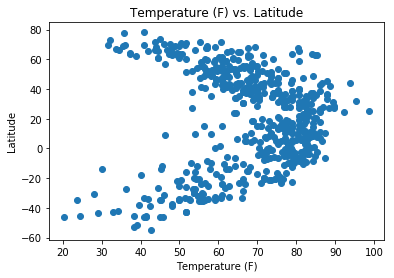

In [14]:
plt.scatter(df_final_cities['Temperature (F)'], df_final_cities['Latitude'])
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.show()
plt.savefig('temp_lat.png')

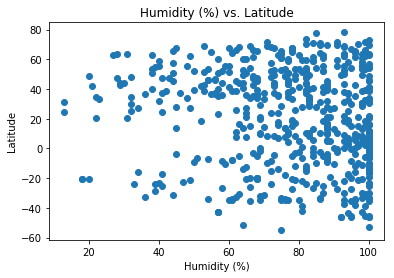

In [15]:
plt.scatter(df_final_cities['Humidity (%)'], df_final_cities['Latitude'])
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.show()
plt.savefig('humid_lat.png')

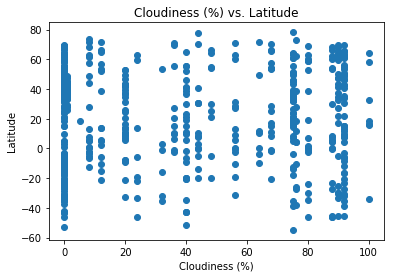

In [16]:
plt.scatter(df_final_cities['Cloudiness (%)'], df_final_cities['Latitude'])
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.show()
plt.savefig('cloud_lat.png')

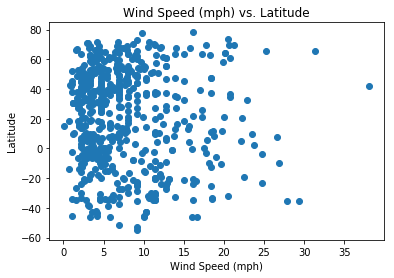

In [17]:
plt.scatter(df_final_cities['Wind Speed (mph)'], df_final_cities['Latitude'])
plt.title("Wind Speed (mph) vs. Latitude")
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.show()
plt.savefig('wind_lat.png')

In [18]:
df_final_cities.to_csv('final_weather_cities.csv')